# Audible Insights: Book Recommendation System

## NLP and Clustering

### Importing Libraries

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [3]:
df = pd.read_csv('cleaned_data.csv')

In [4]:
df.head()

,Book Name,Author,Description,Rating,Number of Reviews,Price,Listening Time (Minutes),Rank,Genre
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,"Over the past three years, Jay Shetty has beco...",4.9,342.0,10080.0,654.0,1,Society & Culture (Books)
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,Brought to you by Penguin.,4.6,3670.0,615.0,203.0,2,Personal Success
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,"In this generation-defining self-help guide, a...",4.4,20240.0,10378.0,317.0,3,Personal Development & Self-Help
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,Brought to you by Penguin.,4.6,4646.0,888.0,335.0,5,Personal Success
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,"Stop going through life, Start growing throug...",4.6,4305.0,1005.0,385.0,6,Spiritualism


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Book Name                 1642 non-null   object 
 1   Author                    1642 non-null   object 
 2   Description               1642 non-null   object 
 3   Rating                    1642 non-null   float64
 4   Number of Reviews         1642 non-null   float64
 5   Price                     1642 non-null   float64
 6   Listening Time (Minutes)  1642 non-null   float64
 7   Rank                      1642 non-null   int64  
 8   Genre                     1642 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 115.6+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Book Name                   0
Author                      0
Description                 0
Rating                      0
Number of Reviews           0
Price                       0
Listening Time (Minutes)    0
Rank                        0
Genre                       0
dtype: int64

In [8]:
# Initialize stopwords & lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):

    tokens = word_tokenize(text)  # Tokenize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Lemmatization & stopword removal
    return " ".join(tokens)
    
# Apply preprocessing
df['Processed_Description'] = df['Description'].apply(preprocess_text)

   

In [9]:
# Check cleaned text
df[['Description', 'Processed_Description']].head(5)

,Description,Processed_Description
0,"Over the past three years, Jay Shetty has beco...","Over past three year , Jay Shetty become one w..."
1,Brought to you by Penguin.,Brought Penguin .
2,"In this generation-defining self-help guide, a...","In generation-defining self-help guide , super..."
3,Brought to you by Penguin.,Brought Penguin .
4,"Stop going through life, Start growing throug...","Stop going life , Start growing life !"


In [10]:
## Vectorizing text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed_Description'])

In [11]:
# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)


In [12]:
# Reducing Dimensions with PCA
pca = PCA(n_components=2) 
tfidf_reduced = pca.fit_transform(tfidf_matrix.toarray())

print("Original TF-IDF Shape:", tfidf_matrix.shape)
print("Reduced Shape:", tfidf_reduced.shape)

Original TF-IDF Shape: (1642, 1000)
Reduced Shape: (1642, 2)


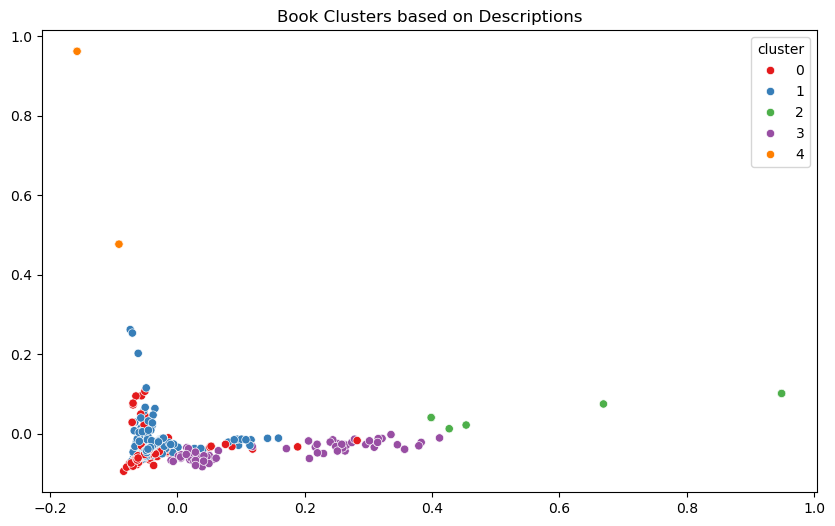

In [13]:
# Visualizing the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=tfidf_reduced[:, 0], y=tfidf_reduced[:, 1], hue=df['cluster'], palette='Set1')
plt.title('Book Clusters based on Descriptions')
plt.show()

In [14]:
df.head()

,Book Name,Author,Description,Rating,Number of Reviews,Price,Listening Time (Minutes),Rank,Genre,Processed_Description,cluster
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,"Over the past three years, Jay Shetty has beco...",4.9,342.0,10080.0,654.0,1,Society & Culture (Books),"Over past three year , Jay Shetty become one w...",1
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,Brought to you by Penguin.,4.6,3670.0,615.0,203.0,2,Personal Success,Brought Penguin .,2
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,"In this generation-defining self-help guide, a...",4.4,20240.0,10378.0,317.0,3,Personal Development & Self-Help,"In generation-defining self-help guide , super...",1
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,Brought to you by Penguin.,4.6,4646.0,888.0,335.0,5,Personal Success,Brought Penguin .,2
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,"Stop going through life, Start growing throug...",4.6,4305.0,1005.0,385.0,6,Spiritualism,"Stop going life , Start growing life !",1


In [15]:
df.columns

Index(['Book Name', 'Author', 'Description', 'Rating', 'Number of Reviews',
       'Price', 'Listening Time (Minutes)', 'Rank', 'Genre',
       'Processed_Description', 'cluster'],
      dtype='object')

In [18]:
df.drop(columns = ['Description'], inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Book Name                 1642 non-null   object 
 1   Author                    1642 non-null   object 
 2   Rating                    1642 non-null   float64
 3   Number of Reviews         1642 non-null   float64
 4   Price                     1642 non-null   float64
 5   Listening Time (Minutes)  1642 non-null   float64
 6   Rank                      1642 non-null   int64  
 7   Genre                     1642 non-null   object 
 8   Processed_Description     1642 non-null   object 
 9   cluster                   1642 non-null   int32  
dtypes: float64(4), int32(1), int64(1), object(4)
memory usage: 122.0+ KB


In [21]:
df.to_csv("books_clusters.csv", index=False)